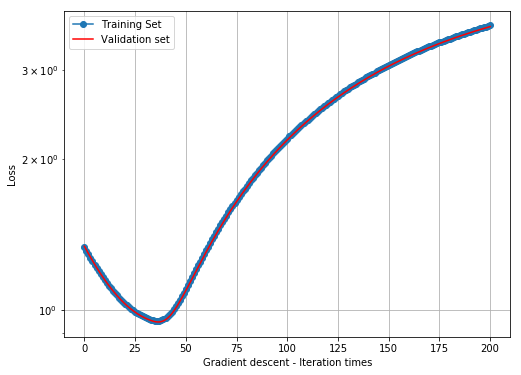

In [12]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random

def get_data():
    data = load_svmlight_file(r"D:\a9a.txt")
    return data[0], data[1]
def get_testdata():
    data = load_svmlight_file(r"D:\a9atest.txt")
    return data[0], data[1]
def add_bias(matrix):
    bias=[]
    for i in range(matrix.shape[0]):
        bias.append(1)
    matrix=np.column_stack((matrix,bias))
    return matrix

# f为假设函数，即目标函数,用于分类,当 f > 0,y = +1 当 f < 0,y = -1 当 f = 0, 该点在分类超平面上
def f(x, w, b):
    f_result = 0
    x = np.ndarray.tolist(x)
	# print x
    for i in range(len(x[0])):
        f_result += x[0][i] * w[i]
    f_result += b
    return f_result

def cal_accuracy(w, b, X_val, y_val):
    x = np.ndarray.tolist(X_val)
    right_num = 0
    for i in range(len(x[0])):
        result = f(X_val[i, :], w, b)
        if result > 0 and y_val[i] == 1 or result < 0 and y_val[i] == -1:
            right_num += 1
    return float(right_num) / float(len(x[0]))
def computerloss(X,y,w,b):
    loss_result=0
    X_size = len(X)
    n=123
    loss_result=sum([w[i] ** 2 for i in range(n)]) + 1.0 / X_size * sum([max(0, 1 - y[i] * f(X[i, :], w, b)) for i in range(X_size)])
    return loss_result
def SVM_SGD(option):
    X_train, y_train = get_data()
    X_test, y_test = get_testdata()
    X_train = X_train.todense()
    X_test= X_test.todense()
    X_test=add_bias(X_test)#只有122维，要加一维
	# 初始化参数的三种方式，共有123个属性，即123个系数
	# b = 0
    n = 123#数据的属性
    #b随机生成函数
    b = random.random()
    if option == 0:
        w = [0] * n
    elif option == 1:
        w = np.random.rand(n)
    else:
        w = np.random.randn(n)
    aa = 0.0098
    X_size = len(X_train)
    X_val_size = len(X_test)
    loss = computerloss(X_train,y_train,w,b)
	# print loss
    cnt = 0
    train_loss = []
    test_loss = []
    while True:
		# 对w各分量wi进行下降
        for i in range(n):
            gradient_aver = w[i] + sum([((y_train[k] < 1) * (-y_train[k]) * X_train[k, i]) for k in range(100)]) / 100
			# print gradient_aver
            w[i] -= gradient_aver * aa
		# print cal_accuracy(w, b, X_train, y_train)
        new_loss = computerloss(X_train,y_train,w,b)
        t_loss = computerloss(X_test,y_test,w,b)
        if abs(loss - new_loss) > 0.00001:
            loss = new_loss
        else:
            break
        train_loss.append(loss)
        test_loss.append(t_loss)
        cnt += 1
        if option == 0 and cnt > 200:
            break
        elif option == 1 and cnt > 200:
            break
        elif cnt > 280:
            break
    plt.figure(figsize=(8,6))
    plt.yscale('log')
    plt.xlabel('Gradient descent - Iteration times')
    plt.ylabel('Loss')
    plt.plot(range(cnt), train_loss, 'o-', label=u"Training Set")
    plt.plot(range(cnt), test_loss, 'r-', label=u"Validation set")
    plt.legend()
    plt.grid()
    plt.show()
SVM_SGD(0)

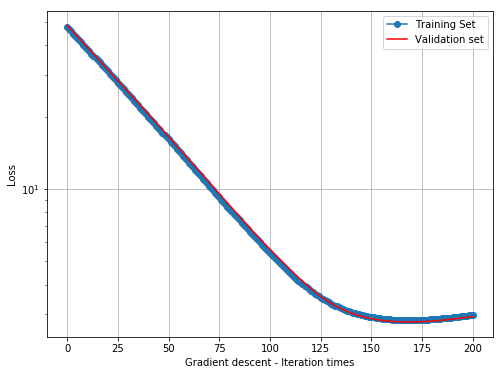

In [13]:
SVM_SGD(1) # 模型参数 - > 各分量权重初始化为 0

In [ ]:
SVM_SGD(2) # 模型参数 - > 各分量权重随机初始化

In [7]:
def comtheta(aa,w,X_train,y_train,batch):
    n=123
    gradient_aver=0
    for i in range(n):
            gradient_aver = w[i] + sum([((y_train[k] < 1) * (-y_train[k]) * X_train[k, i]) for k in range(100)]) / 100
			# print gradient_aver
            w[i] -= gradient_aver * aa
    return w
def NAG(aa,w,X_train,y_train,batch,va_head,Va):
    n=123
    gradient_aver=0
    #grad=[0]*n
    alpha=aa
    #w=[0]*n
    cnt=0
    #va_head=[0]*n
    gamma=0.9
   # Va=[0]*n
    batch=100#mini-batch SGD ,求梯度的样本数为100
        #grad=computer_minibatch_Grad(X_train,y_train,theta,grad,batch)
    #开始更新theta
    for i in range(n):
            gradient_aver = w[i] + sum([((y_train[k] < 1) * (-y_train[k]) * X_train[k, i]) for k in range(batch)]) / batch
			# print gradient_aver
            va_head[i]=Va[i]
            Va[i]=gamma*Va[i]-alpha*gradient_aver
            w[i]=w[i]-gamma*va_head[i]+(1+gamma)*Va[i]
            #w[i] -= gradient_aver * aa
    return w,va_head, Va
def SVM_NAG(options):
    X_train, y_train = get_data()
    X_val, y_val = get_testdata()
    X_train = X_train.todense()
    X_val = X_val.todense()
    X_test=add_bias(X_test)#只有122维，要加一维
	# 初始化参数的三种方式，共有123个属性，即123个系数
	# b = 0随机生成
    n=123
    b = random.random()
    if options == 1:
        w = [0] * n
    elif options == 2:
        w = np.random.rand(n)
    else:
        w = np.random.randn(n)
	# w_sum = sum(w)
	# w = [w[i]/w_sum for i in range(14)]
	# print w
	# loss函数为 1/(2*n) * sum([(h(X[i])-y[i])**2 for i in range(n)]) n为向量维度
	# w[i] = w[i] - a * 1/n * sum([(h(X[i])-y[i]) for i in range(n)]) a为学习系数 0.0001 0.0016 0.03
	# a = 0.16
	# 学习步长为aa
    aa = 0.00098
    X_size = len(X_train)
    X_val_size = len(X_val)
    loss = sum([w[i] ** 2 for i in range(n)]) + 1.0 / X_size * sum([max(0, 1 - y_train[i] * f(X_train[i, :], w, b)) for i in range(X_size)])
	# print loss
    #w=[0]*n
    cnt = 0
    train_loss = []
    val_loss = []
    batch=100
    va_head=[0]*n
    gamma=0.9
    Va=[0]*n
    w,va_head,Va=NAG(aa,w,X_train,y_train,batch,va_head,Va)
    while True:
		# 对w各分量wi进行下降
        w,va_head,Va=NAG(aa,w,X_train,y_train,batch,va_head,Va)
		# print cal_accuracy(w, b, X_train, y_train)
        new_loss = sum([w[i] ** 2 for i in range(n)]) + 1.0 / X_size * sum([max(0, 1 - y_train[i] * f(X_train[i, :], w, b)) for i in range(X_size)])
        v_loss = sum([w[i] ** 2 for i in range(n)]) + 1.0 / X_val_size * sum([max(0, 1 - y_val[i] * f(X_val[i, :], w, b)) for i in range(X_val_size)])
        if abs(loss - new_loss) > 0.000001:
            loss = new_loss
        else:
            print("loss",loss)
            print("loss",new_loss)
            print("cnt",cnt)
            break
        train_loss.append(loss)
        val_loss.append(v_loss)
        cnt += 1
        if options == 1 and cnt > 50:
            break
        elif options == 2 and cnt > 200:
            break
        elif cnt > 280:
            break
    plt.figure(figsize=(8,6))
    plt.xlabel('Gradient descent - Iteration times')
    plt.ylabel('Loss')
    plt.plot(range(cnt), train_loss, 'o-', label=u"Training Set")
    plt.plot(range(cnt), val_loss, 'r-', label=u"Validation set")
    plt.legend()
    plt.grid()
    plt.show()
print("给点反应啦")


给点反应啦


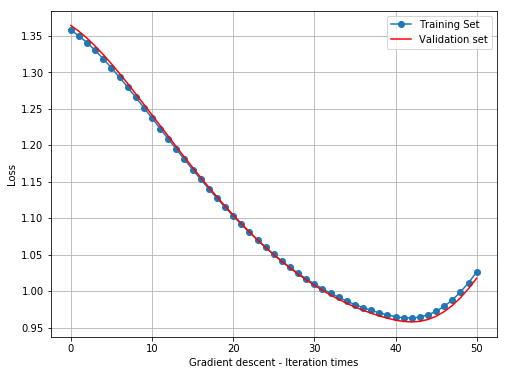

In [8]:
SVM_NAG(1) # 模型参数 - > 各分量权重初始化为 0

In [ ]:
SVM_NAG(2)## 模型参数 - > 各分量权重随机初始化

In [ ]:
print("跑一下")
SVM_NAG(3)

跑一下


In [100]:
import math
def RMSProp(aa,w,X_train,y_train,batch,cache):
    n=123
    gradient_aver=0
    #grad=[0]*n
    alpha=aa
    #w=[0]*n
    cnt=0
    #va_head=[0]*n
    decay_rate=0.9
    eps=math.pow(10, -8 )
   # Va=[0]*n
    batch=100#mini-batch SGD ,求梯度的样本数为100
        #grad=computer_minibatch_Grad(X_train,y_train,theta,grad,batch)
    #开始更新theta
    for i in range(n):
            gradient_aver = w[i] + sum([((y_train[k] < 1) * (-y_train[k]) * X_train[k, i]) for k in range(batch)]) / batch
			# print gradient_aver
            cache[i]=decay_rate*cache[i]+(1-decay_rate)*gradient_aver*gradient_aver
            w[i]-=alpha*(1/(np.sqrt(cache[i]+eps)))*gradient_aver
            #w[i] -= gradient_aver * aa
    return w,cache
def SVM_RMAProp(options):
    X, y = get_data()
	# 将原训练集再切分为2:1的更小训练集和验证集
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)
	# 初始化参数的三种方式，共有13个属性，即13个系数
	# b = 0
    b = random.random()
    if options == 1:
        w = [0] * 14
    elif options == 2:
        w = np.random.rand(14)
    else:
        w = np.random.randn(14)
	# w_sum = sum(w)
	# w = [w[i]/w_sum for i in range(14)]
	# print w
	# loss函数为 1/(2*n) * sum([(h(X[i])-y[i])**2 for i in range(n)]) n为向量维度
	# w[i] = w[i] - a * 1/n * sum([(h(X[i])-y[i]) for i in range(n)]) a为学习系数 0.0001 0.0016 0.03
	# a = 0.16
	# 学习步长为aa
    aa = 0.01
    n = 14
    X_train = X_train.todense()
    X_val = X_val.todense()
    X_size = len(X_train)
    X_val_size = len(X_val)
    loss = sum([w[i] ** 2 for i in range(n)]) + 1.0 / X_size * sum([max(0, 1 - y_train[i] * f(X_train[i, :], w, b)) for i in range(X_size)])
	# print loss
    #w=[0]*n
    cnt = 0
    train_loss = []
    val_loss = []
    batch=100
    cache=[0]*n
    Va=[0]*n
   # w,cache=NAG(aa,w,X_train,y_train,batch,cache)
    while True:
		# 对w各分量wi进行下降
        w,cache=RMSProp(aa,w,X_train,y_train,batch,cache)
		# print cal_accuracy(w, b, X_train, y_train)
        new_loss = sum([w[i] ** 2 for i in range(n)]) + 1.0 / X_size * sum([max(0, 1 - y_train[i] * f(X_train[i, :], w, b)) for i in range(X_size)])
        v_loss = sum([w[i] ** 2 for i in range(n)]) + 1.0 / X_val_size * sum([max(0, 1 - y_val[i] * f(X_val[i, :], w, b)) for i in range(X_val_size)])
        if abs(loss - new_loss) > 0.000001:
            loss = new_loss
        else:
            print("loss",loss)
            print("loss",new_loss)
            print("cnt",cnt)
            break
        train_loss.append(loss)
        val_loss.append(v_loss)
        cnt += 1
        if options == 1 and cnt > 50:
            break
        elif options == 2 and cnt > 200:
            break
        elif cnt > 280:
            break
    plt.figure(figsize=(8,6))
    plt.xlabel('Gradient descent - Iteration times')
    plt.ylabel('Loss')
    plt.plot(range(cnt), train_loss, 'o-', label=u"Training Set")
    plt.plot(range(cnt), val_loss, 'r-', label=u"Validation set")
    plt.legend()
    plt.grid()
    plt.show()
print("给点反应啦")


给点反应啦


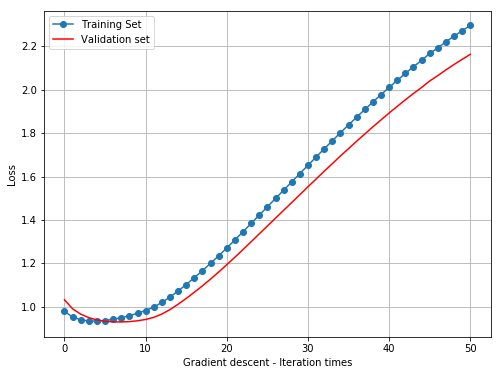

In [101]:
SVM_RMAProp(1)

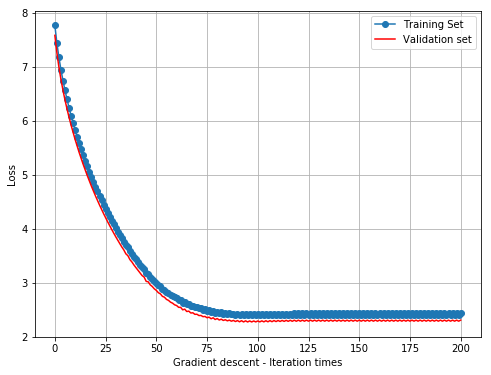

In [102]:
SVM_RMAProp(2)

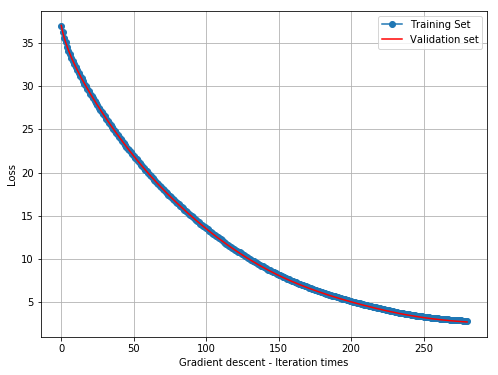

In [103]:
SVM_RMAProp(3)

In [138]:
import math
def AdaDelta(aa,w,X_train,y_train,batch,cache,t):
    n=14
    gradient_aver=0
    alpha=aa
    decay_rate=0.9
    #eps=1e-8或eps=1e-9并不收敛
    eps=math.pow(10, -5 )
    #print("eps",eps)
    batch=100#mini-batch SGD ,求梯度的样本数为100
        #grad=computer_minibatch_Grad(X_train,y_train,theta,grad,batch)
    #开始更新theta
    for i in range(n):
            gradient_aver = w[i] + sum([((y_train[k] < 1) * (-y_train[k]) * X_train[k, i]) for k in range(batch)]) / batch
			# print gradient_aver
            cache[i]=decay_rate*cache[i]+(1-decay_rate)*gradient_aver*gradient_aver
            #print("why1",t[i]+eps)
            #print("why2",cache[i]+eps)
            g_w=-(np.sqrt(t[i]+eps))*(1/np.sqrt(cache[i]+eps))*gradient_aver
            w[i]+=g_w
            t[i]=decay_rate*t[i]+(1-decay_rate)*g_w*g_w
            #w[i] -= gradient_aver * aa
    return w,cache,t
def SVM_AdaDelta(options):
    X, y = get_data()
	# 将原训练集再切分为2:1的更小训练集和验证集
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)
	# 初始化参数的三种方式，共有13个属性，即13个系数
	# b = 0
    b = random.random()
    if options == 1:
        w = [0] * 14
    elif options == 2:
        w = np.random.rand(14)
    else:
        w = np.random.randn(14)
	# w_sum = sum(w)
	# w = [w[i]/w_sum for i in range(14)]
	# print w
	# loss函数为 1/(2*n) * sum([(h(X[i])-y[i])**2 for i in range(n)]) n为向量维度
	# w[i] = w[i] - a * 1/n * sum([(h(X[i])-y[i]) for i in range(n)]) a为学习系数 0.0001 0.0016 0.03
	# a = 0.16
	# 学习步长为aa
    aa = 0.1
    n = 14
    X_train = X_train.todense()
    X_val = X_val.todense()
    X_size = len(X_train)
    X_val_size = len(X_val)
    loss = sum([w[i] ** 2 for i in range(n)]) + 1.0 / X_size * sum([max(0, 1 - y_train[i] * f(X_train[i, :], w, b)) for i in range(X_size)])
    cnt = 0
    train_loss = []
    val_loss = []
    batch=100
    cache=[0]*n
    t=[0]*n
   # w,cache=NAG(aa,w,X_train,y_train,batch,cache)
    while True:
		# 对w各分量wi进行下降
        w,cache,t=AdaDelta(aa,w,X_train,y_train,batch,cache,t)
		# print cal_accuracy(w, b, X_train, y_train)
        new_loss = sum([w[i] ** 2 for i in range(n)]) + 1.0 / X_size * sum([max(0, 1 - y_train[i] * f(X_train[i, :], w, b)) for i in range(X_size)])
        v_loss = sum([w[i] ** 2 for i in range(n)]) + 1.0 / X_val_size * sum([max(0, 1 - y_val[i] * f(X_val[i, :], w, b)) for i in range(X_val_size)])
        if abs(loss - new_loss) > 0.000001:
            loss = new_loss
        else:
            print("loss",loss)
            print("loss",new_loss)
            print("cnt",cnt)
            break
        train_loss.append(loss)
        val_loss.append(v_loss)
        cnt += 1
        if options == 1 and cnt > 50:
            break
        elif options == 2 and cnt > 200:
            break
        elif cnt > 280:
            break
    plt.figure(figsize=(8,6))
    plt.xlabel('Gradient descent - Iteration times')
    plt.ylabel('Loss')
    plt.plot(range(cnt), train_loss, 'o-', label=u"Training Set")
    plt.plot(range(cnt), val_loss, 'r-', label=u"Validation set")
    plt.legend()
    plt.grid()
    plt.show()
print("给点反应啦")


给点反应啦


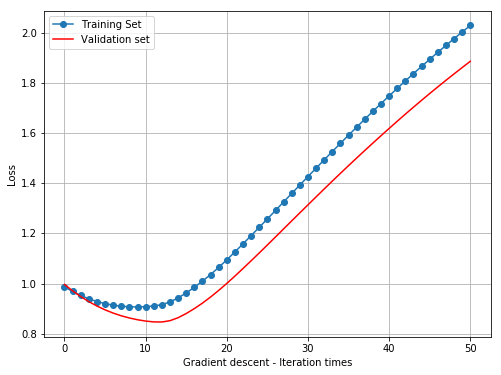

In [139]:
SVM_AdaDelta(1)

loss 2.55981875926
loss 2.55981962903
cnt 164


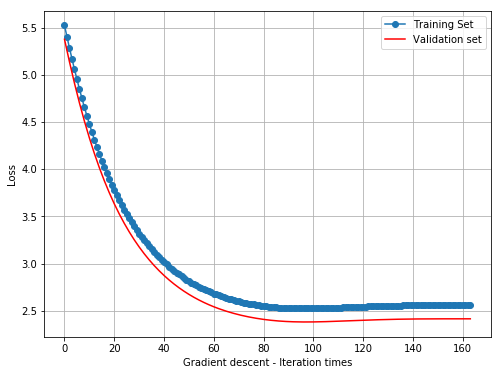

In [140]:
SVM_AdaDelta(2)

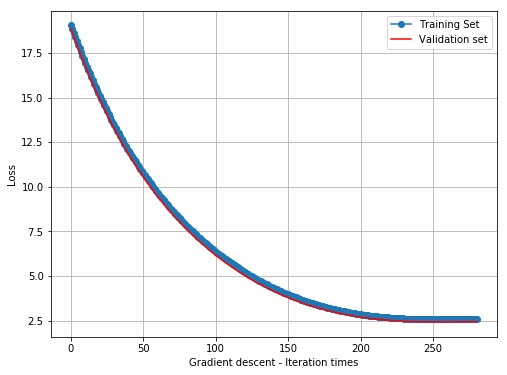

In [144]:
SVM_AdaDelta(3)

In [29]:
#Adam
import math
def Adam(aa,w,X_train,y_train,batch,cache,mt,t):
    n=14
    alpha=aa
    decay_rate=0.999
    bete=0.9
    #eps=1e-8或eps=1e-9并不收敛
    eps=math.pow(10, -8 )
    #print("eps",eps)
    batch=100#mini-batch SGD ,求梯度的样本数为100
        #grad=computer_minibatch_Grad(X_train,y_train,theta,grad,batch)
    #开始更新theta
    t+=1
    alpha=alpha/(np.sqrt(t))
    gradient_aver=0
    for i in range(n):
            gradient_aver = w[i] + sum([((y_train[k] < 1) * (-y_train[k]) * X_train[k, i]) for k in range(batch)]) / batch
			# print gradient_aver
            mt[i]=bete*mt[i]+(1-bete)*gradient_aver
            cache[i]=decay_rate*cache[i]+(1-decay_rate)*gradient_aver*gradient_aver
            #print("why1",t[i]+eps)
            #print("why2",cache[i]+eps)
            g_w=alpha*(np.sqrt(1-math.pow(decay_rate,t)))*(1/(1-math.pow(bete,t)))
            w[i]-=g_w*mt[i]*(1/(np.sqrt(cache[i]+eps)))
            #w[i] -= gradient_aver * aa
    return w,cache,mt,t
def SVM_Adam(options):
    X, y = get_data()
	# 将原训练集再切分为2:1的更小训练集和验证集
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)
	# 初始化参数的三种方式，共有13个属性，即13个系数
	# b = 0
    b = random.random()
    if options == 1:
        w = [0] * 14
    elif options == 2:
        w = np.random.rand(14)
    else:
        w = np.random.randn(14)
	# w_sum = sum(w)
	# w = [w[i]/w_sum for i in range(14)]
	# print w
	# loss函数为 1/(2*n) * sum([(h(X[i])-y[i])**2 for i in range(n)]) n为向量维度
	# w[i] = w[i] - a * 1/n * sum([(h(X[i])-y[i]) for i in range(n)]) a为学习系数 0.0001 0.0016 0.03
	# a = 0.16
	# 学习步长为aa
    aa = 0.001
    n = 14
    X_train = X_train.todense()
    X_val = X_val.todense()
    X_size = len(X_train)
    X_val_size = len(X_val)
    loss = sum([w[i] ** 2 for i in range(n)]) + 1.0 / X_size * sum([max(0, 1 - y_train[i] * f(X_train[i, :], w, b)) for i in range(X_size)])
    cnt = 0
    train_loss = []
    val_loss = []
    batch=100
    cache=[0]*n
    mt=[0]*n
    t=0#时间
   # w,cache=NAG(aa,w,X_train,y_train,batch,cache)
    while True:
		# 对w各分量wi进行下降
        w,cache,mt,t=Adam(aa,w,X_train,y_train,batch,cache,mt,t)
		# print cal_accuracy(w, b, X_train, y_train)
        new_loss = sum([w[i] ** 2 for i in range(n)]) + 1.0 / X_size * sum([max(0, 1 - y_train[i] * f(X_train[i, :], w, b)) for i in range(X_size)])
        v_loss = sum([w[i] ** 2 for i in range(n)]) + 1.0 / X_val_size * sum([max(0, 1 - y_val[i] * f(X_val[i, :], w, b)) for i in range(X_val_size)])
        if abs(loss - new_loss) > 0.000001:
            loss = new_loss
        else:
            print("loss",loss)
            print("loss",new_loss)
            print("cnt",cnt)
            break
        train_loss.append(loss)
        val_loss.append(v_loss)
        cnt += 1
        if options == 1 and cnt > 50:
            break
        elif options == 2 and cnt > 200:
            break
        elif cnt > 280:
            break
    plt.figure(figsize=(8,6))
    plt.xlabel('Gradient descent - Iteration times')
    plt.ylabel('Loss')
    plt.plot(range(cnt), train_loss, 'o-', label=u"Training Set")
    plt.plot(range(cnt), val_loss, 'r-', label=u"Validation set")
    plt.legend()
    plt.grid()
    plt.show()
print("给点反应啦")


给点反应啦


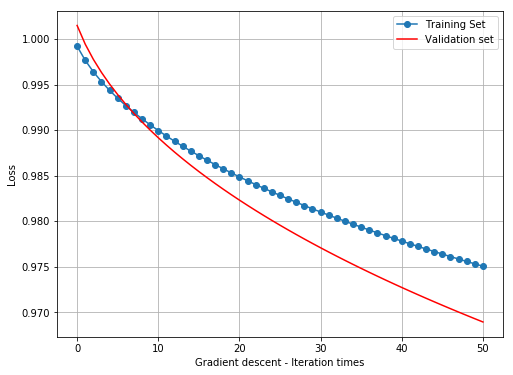

In [30]:
SVM_Adam(1)

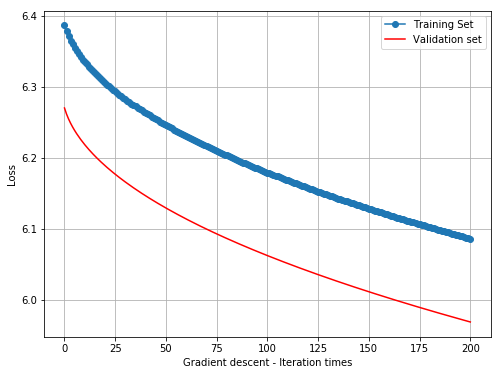

In [31]:
SVM_Adam(2)

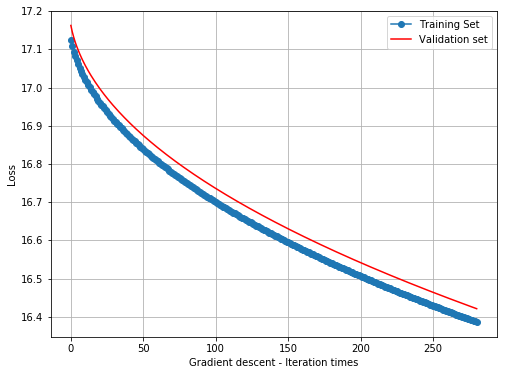

In [32]:
SVM_Adam(3)